# Natural Language Processing - Обработка естественного языка
## 24.11.2022
## Айдар Валеев
* аспирант Университета Иннополис
* интересы: Глубокое обучение, Машинный перевод, Генерация комментариев для исходного кода


<br>

---
<br>

# План на сегодня
* **Предобработка текста**
* Парсинг
* Задачи NLP
* TF-IDF
* Семантический анализ

<br>

---
<br>

# Предобработка текста

* Токенизация
* Лемматизация
* Стемминг
* Стоп-слова

<br>

---
<br>

## Токенизация

"Трудолюбивые студенты старательно учатся обработке естественных языков."

-> ["Трудолюбивые", "студенты", "старательно", "учатся", "обработке", "естественных", "языков"]

<br>

Сложности: пунктуация и некорректные символы.

In [1]:
import nltk
# Natural Language Toolkit
# https://www.nltk.org/api/nltk.tokenize.html

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
nltk.word_tokenize("Трудолюбивые студенты старательно учатся обработке естественных языков.")

['Трудолюбивые',
 'студенты',
 'старательно',
 'учатся',
 'обработке',
 'естественных',
 'языков',
 '.']

In [3]:
s = "В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель. Такие обработчики называются токенизаторами (англ. Tokenize). Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок)."
nltk.sent_tokenize(s)

['В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель.',
 'Такие обработчики называются токенизаторами (англ.',
 'Tokenize).',
 'Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок).']

In [4]:
!pip install rusenttokenize # установить библиотеку rusenttokenize

from IPython.display import clear_output
clear_output() # удалить вывод ячейки

In [12]:
from rusenttokenize import ru_sent_tokenize

# sent_tokenize от deeppavlov
# https://github.com/deeppavlov/ru_sentence_tokenizer
ru_sent_tokenize(s)

['В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель.',
 'Такие обработчики называются токенизаторами (англ. Tokenize).',
 'Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок).']

In [13]:
!python -m spacy download ru_core_news_sm
clear_output()

In [14]:
import spacy
nlp = spacy.load("ru_core_news_sm")

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [15]:
doc = nlp(s)
list(doc.sents)

NameError: name 'nlp' is not defined

In [ ]:
[nltk.word_tokenize(x.text) for x in doc.sents]

<br>

---
<br>

## Лемматизация

* 'Трудолюбивые' -> 'трудолюбивый'
* 'студенты' -> 'студент'
* 'старательно' -> 'старательно'
* 'учатся' -> 'учиться'
* 'обработке' -> 'обработка'
* 'естественных' -> 'естественный'
* 'языков' -> 'язык'

In [ ]:
s2 = "Трудолюбивые студенты старательно учатся обработке естественных языков."

In [ ]:
nlp = spacy.load("ru_core_news_sm")
lemmatizer = nlp.get_pipe("lemmatizer")

print(lemmatizer.mode)  # какой лемматизатор используется
print([token.lemma_ for token in nlp(s2)])

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

print([morph.parse(w)[0].normal_form for w in nltk.word_tokenize(s2)])

<br>

---
<br>

## Стемминг

* 'Трудолюбивые' -> 'трудолюбив'
* 'студенты' -> 'студент'
* 'старательно' -> 'старательн'
* 'учатся' -> 'учат'
* 'обработке' -> 'обработк'
* 'естественных' -> 'естествен'
* 'языков' -> 'язык'

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="russian")

for token in nltk.word_tokenize(s2):
    print(token + ' --> ' + stemmer.stem(token))

<br>

---
<br>

## Стоп-слова

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

for i in range(len(stopwords.words("russian")) // 10 + 1):
    print(stopwords.words("russian")[10 * i:10 *(i + 1)])

In [ ]:
[w for w in nltk.word_tokenize("которые позволяют разбить его на блоки, пригодные для подачи в модель")
 if w not in stopwords.words("russian")]

<br>

---
<br>

## Еще немного про инструменты

### nltk.corpus

In [ ]:
# в nltk.corpus есть много датасетов, которые могут пригодиться
# примеры: https://www.nltk.org/book/ch02.html
nltk.download("brown")

In [6]:
from nltk.corpus import brown, reuters
brown.raw()

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\Users\\maxim/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\maxim\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [7]:
brown.words(categories='news')

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\Users\\maxim/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\maxim\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [8]:
brown.words(brown.fileids()[1])

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\Users\\maxim/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\maxim\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [9]:
brown.sents(categories=['news', 'editorial', 'reviews'])

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - 'C:\\Users\\maxim/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\maxim\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


<br>

### pymorphy2

[Морфологический анализ](https://pymorphy2.readthedocs.io/en/stable/user/guide.html#id3)

In [ ]:
!pip install pymorphy2
clear_output()

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

In [ ]:
p = morph.parse('стали')[0]
p.tag

OpencorporaTag('VERB,perf,intr plur,past,indc')

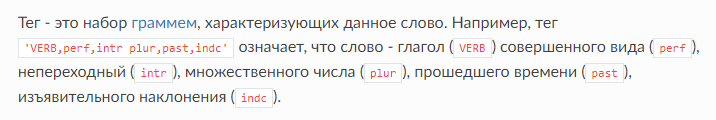

In [ ]:
butyavka = morph.parse('бутявка')[0]
print(butyavka.inflect({'gent'}))  # нет кого? (родительный падеж)
print(butyavka.inflect({'plur', 'gent'}))  # кого много?

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((DictionaryAnalyzer(), 'явки', 8, 1), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'бут')))
Parse(word='бутявок', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='бутявка', score=1.0, methods_stack=((DictionaryAnalyzer(), 'явок', 8, 8), (UnknownPrefixAnalyzer(score_multiplier=0.5), 'бут')))


<br>

### Расстояние Левенштейна
**Edit distance**

определяется как минимальное количество односимвольных операций

(а именно вставки, удаления, замены), необходимых для превращения

одной последовательности символов в другую.

In [ ]:
!pip install python-Levenshtein
clear_output()

In [ ]:
from Levenshtein import distance

print(distance("президент", "резидент"))
print(distance("аквапарк", "автопарк"))
print(distance("россия", "германия"))

1
3
5


<br>

---
<br>

## Пример простой предобработки

In [ ]:
import re
import unicodedata


def preprocess_sentence(s):
    # убрать пробелы в начале и в конце строки
    s = s.strip()
    
    # перевести все символы в нижний регистр
    s = s.lower()
    
    # отделить пробелами символы ".", ",", "!", "?"
    s = re.sub(r"([.,!?])", r" \1 ", s)
    
    # заменить на пробелы все символы, кроме а-я, А-Я, ".", ",", "!", "?"
    s = re.sub(r"[^а-яА-Я.,!?]+", " ", s)
    
    # убрать дублирующие пробелы
    s = re.sub(r"\s{2,}", " ", s)
    
    # убрать пробелы в начале и в конце строки
    s = s.strip()
    return s

<br>

---
<br>

# План на сегодня
* Предобработка текста
* **Парсинг**
* Задачи NLP
* TF-IDF
* Семантический анализ

<br>

---
<br>

# Парсинг

* Иерархия Хомского
* Синтаксический парсер
* Регулярные выражения

<br>

---
<br>

## Иерархия Хомского

1. "Я ем капусту" = Подлежащее + Сказуемое + Объект = Предложение

2. "Трудолюбивые студенты старательно учатся обработке естественных языков" = 
   
   = Подлежащее + Сказуемое + Объект = Предложение

<br>

--- 
<br>

Попробуем выразить грамматику через формулы (с допущениями):

* Предложение = Подлежащее + Сказуемое + Объект
* Подлежащее = Прилагательное + Существительное
* Сказуемое = Наречие + Глагол
* Объект = Прилагательное + Существительное
* ...

Разумеется, русский язык намного сложнее, чем эта грамматика.

Но бывает полезно придумать свой формальный язык, определив его подобной формальной грамматикой.

<br>

--- 
<br>

Согласно Хомскому, формальные грамматики можно разделить на четыре типа:

* Регулярные
* Контекстно-свободные
* Контекстно-зависимые
* Рекурсивно-перечислимые


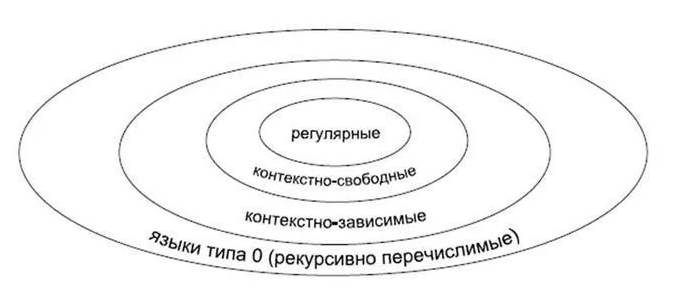

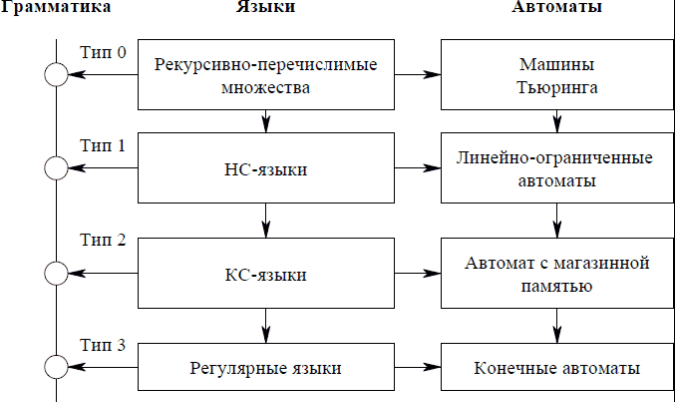

[Иерархия Хомского формальных грамматик](https://neerc.ifmo.ru/wiki/index.php?title=Иерархия_Хомского_формальных_грамматик)

[Примеры решения задач по теме «Формальные языки и грамматики»](https://ozlib.com/955476/tehnika/primery_resheniya_zadach_teme_formalnye_yazyki_grammatiki)

[Основы теории формальных языков](http://dspace.kgsu.ru/xmlui/bitstream/handle/123456789/5086/Медведев-АА_2018_МУ.pdf)


<br>

--- 
<br>

## Синтаксический парсер

In [ ]:
!python -m spacy download en_core_web_sm
clear_output()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc2 = nlp("Autonomous cars shift insurance liability toward manufacturers")

In [ ]:
for chunk in doc2.noun_chunks:
    print(f"{chunk.text} | {chunk.root.text} | {chunk.root.dep_}")

Autonomous cars | cars | nsubj
insurance liability | liability | dobj
manufacturers | manufacturers | pobj


In [ ]:
# https://en.wikipedia.org/wiki/Grammatical_relation
# https://universaldependencies.org/en/dep/
print(nlp.get_pipe("parser").labels)

('ROOT', 'acl', 'acomp', 'advcl', 'advmod', 'agent', 'amod', 'appos', 'attr', 'aux', 'auxpass', 'case', 'cc', 'ccomp', 'compound', 'conj', 'csubj', 'csubjpass', 'dative', 'dep', 'det', 'dobj', 'expl', 'intj', 'mark', 'meta', 'neg', 'nmod', 'npadvmod', 'nsubj', 'nsubjpass', 'nummod', 'oprd', 'parataxis', 'pcomp', 'pobj', 'poss', 'preconj', 'predet', 'prep', 'prt', 'punct', 'quantmod', 'relcl', 'xcomp')


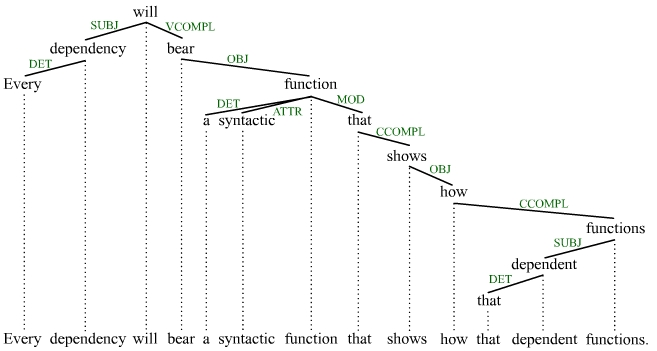

In [ ]:
!pip install stanza
clear_output()

In [ ]:
import stanza

stanza.download('ru')
nlp = stanza.Pipeline('ru')

INFO:stanza:Downloading default packages for language: ru (Russian) ...
INFO:stanza:File exists: /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
print(nlp(s2))

[
  [
    {
      "id": 1,
      "text": "Трудолюбивые",
      "lemma": "трудолюбивый",
      "upos": "ADJ",
      "feats": "Case=Nom|Degree=Pos|Number=Plur",
      "head": 2,
      "deprel": "amod",
      "start_char": 0,
      "end_char": 12,
      "ner": "S-MISC",
      "multi_ner": [
        "S-MISC"
      ]
    },
    {
      "id": 2,
      "text": "студенты",
      "lemma": "студент",
      "upos": "NOUN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur",
      "head": 4,
      "deprel": "nsubj",
      "start_char": 13,
      "end_char": 21,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "старательно",
      "lemma": "старательно",
      "upos": "ADV",
      "feats": "Degree=Pos",
      "head": 4,
      "deprel": "advmod",
      "start_char": 22,
      "end_char": 33,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "учатся",
      "lemma": "учиться",
      "upo

In [ ]:
print(nlp("Вася Пупкин посетил завод Lamborgini в Италии в декабре 2009 года"))

[
  [
    {
      "id": 1,
      "text": "Вася",
      "lemma": "Вася",
      "upos": "PROPN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing",
      "head": 3,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 4,
      "ner": "B-PER",
      "multi_ner": [
        "B-PER"
      ]
    },
    {
      "id": 2,
      "text": "Пупкин",
      "lemma": "Пупкин",
      "upos": "PROPN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing",
      "head": 1,
      "deprel": "appos",
      "start_char": 5,
      "end_char": 11,
      "ner": "E-PER",
      "multi_ner": [
        "E-PER"
      ]
    },
    {
      "id": 3,
      "text": "посетил",
      "lemma": "посетить",
      "upos": "VERB",
      "feats": "Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act",
      "head": 0,
      "deprel": "root",
      "start_char": 12,
      "end_char": 19,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 


<br>

--- 
<br>

## Регулярные выражения

[Tproger: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/)

[Habr: Регулярные выражения в Python от простого к сложному.](https://habr.com/ru/post/349860/)

[Python Doc: Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html)

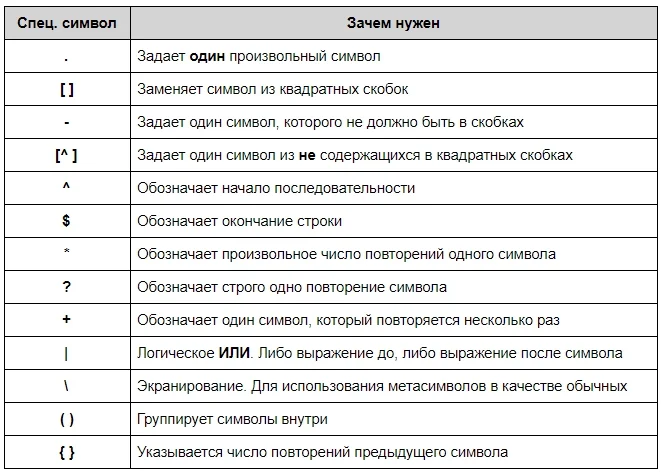

* re.match()
* re.search()
* re.findall()
* re.split()
* re.sub()
* re.compile()

In [ ]:
import re

print(re.match(r"^(aaa)$", "aaa"))

<re.Match object; span=(0, 3), match='aaa'>


In [ ]:
import re
print(re.match(r'AV', 'AV Analytics Vidhya AV').group(0))
print(re.match(r'Analytics', 'AV Analytics Vidhya AV'))

AV
None


In [ ]:
print(re.search(r'AV', 'AV Analytics Vidhya AV').group(0))
print(re.search(r'Analytics', 'AV Analytics Vidhya AV').group(0))

AV
Analytics


In [ ]:
print(re.findall(r'AV', 'AV Analytics Vidhya AV'))

['AV', 'AV']


In [ ]:
print(re.split(r'[it]', 'Analytics Vidhya'))

['Analy', '', 'cs V', 'dhya']


In [ ]:
re.sub(r'AV', 'BC', 'AV Analytics Vidhya AV')

'BC Analytics Vidhya BC'

In [ ]:
pattern = re.compile('AV')
print(pattern.findall('AV Analytics Vidhya AV'))
print(pattern.findall('AV is largest analytics community of India'))

['AV', 'AV']
['AV']


<br>

---
<br>

# План на сегодня
* Предобработка текста
* Парсинг
* **Задачи NLP**
* TF-IDF
* Семантический анализ


<br>

--- 
<br>

# Задачи NLP


## Классификация текста / Text classification

* Нападающий сборной Франции по футболу Килиан Мбаппе признан лучшим игроком матча первого тура чемпионата мира‑2022 с командой Австралии. - **Футбол**
* Мультивселенные везде — у Marvel, DC и даже A24. Это плохо для кино?. - **Кино**
* Китай выразил недовольство позицией Японии по тайваньскому вопросу. - **Политика**

## Оценка тональности текста / Sentiment analysis

* Фильм мне очень понравился, атмосфера завораживает. - **Положительный** отзыв
* Ужасный фильм, только зря потратил время. - **Отрицательный** отзыв

## Определения части речи / Part-of-Speech tagging

* Трудолюбивые студенты старательно учатся обработке естественных языков.
* Прилагат.-ное | существ. | наречие | глагол | существ. | прилагательное | существ. 

## Распознование именованных сущностей / Named entity recognition

* Вася Пупкин посетил завод Lamborgini в Италии в декабре 2009 года
* Person | Person | O | O | Organization | O | Location | O | Date | Date | Date

## Связывание именованных сущностей / Entity linking

* База знаний: { 
  * Василий Пупкин: {id:0, футболист, 1990г.р., Российская Федерация},
  * Петр Романов: {id:1, император, 1672г.р., Российская империя},
  * Василий Пупкин: {id:**2**, политик, 1970г.р., Российская Федерация},
* }
* Министр образования Василий Пупкин заявил о новых реформах
* Министр образования {Василий Пупкин:**2**} заявил о новых реформах

<br>

* [WikiData](https://www.wikidata.org/wiki/Wikidata:Main_Page)
* Пример: [Q159. Russia](https://www.wikidata.org/wiki/Q159)

## Слот-филлинг / Slot-filling

* Откуда: None, куда: None, дата: None, время: None
* Хочу купить билет из Москвы в Санкт-Петербург на 5 декабря
* Откуда: Москва, куда: Санкт-Петербург, дата: 5.12.2022, время: None
* На какое время?
* 15:00
* Откуда: Москва, куда: Санкт-Петербург, дата: 5.12.2022, время: 15:00


## Тематическое моделирование / Topic modeling

* Разбиение набора документов на темы, причем один документ может относиться к нескольким темам.

## Кластеризация текста / Text clusterization

* Разбиение набора документов на кластеры, причем один документ может относиться только к одному кластеру.

## Исправление орфографии / Spell correction

* Произнесненая презиеднтом речь стала певрой в этом году.
* Произнес**ен**ная прези**де**нтом речь стала пе**рв**ой в этом году.

## Текстовый поиск / Text search

* Есть много документов, нужно по запросу получить самые релевантные.
* [Яндекс](https://ya.ru/)

## Извлечение фактов / Information extraction

* Свою искрометную комедию «12 стульев» Леонид Гайдай снял в 1971 году.
* Режиссер: Леонид Гайдай, Фильм: «12 стульев», Дата премьеры: 1971, Жанр: комедия
* [Томита-парсер](https://habr.com/ru/company/yandex/blog/219311/)

## Распознавание и синтез речи / Speech recognition and synthesis

* Распознавание речи - перевод произнесенных в аудиозаписи слов в текстовый формат.
* Синтез речи - автоматическое озвучивание текста.

## Машинный перевод / Machine translation

* "I love Machine Learning and Natural Language Processing."
* "Я люблю Машинное обучение и Обработку естественных языков."
* [Google Translate](https://translate.google.com/)

## Суммаризация / Text summarization

* Генерирующие методы автоматического реферирования основаны на лингвистических правилах обработки естественного языка или методах искусственного интеллекта. Они содержательно обобщают исходный документ, создавая текст, явно в нём не представленный. Достоинства подхода: лучшее качество результата. Недостатки: сложность практической реализации, необходимость сбора большого количества лингвистических знаний.
* Генерирующие методы автоматического реферирования оббощают документ другими словами, имеют лучшее качество, но сложны в реализации и требовательны к количеству данных.

## Языковое моделирование / Language modeling

* "Генерирующие методы автоматического реферирования основаны на"
* "Генерирующие методы автоматического реферирования основаны на использовании модального оператора с константами перед текстом."
* [RuGPT3 Demo](https://russiannlp.github.io/rugpt-demo/)

## Разрешение лексической многозначности / Word sense disambiguation

* Замок был окружен рвом.
* "Заˈмок" - сооружение, а не "замоˈк" - запирающее устройство.

## Вопросно-ответная система / Question answering

* Контекст: Вопросно-ответная система — это задача извлечения ответа из текста на заданный вопрос. Примером набора данных для ответа на вопрос является набор данных SQuAD, который полностью основан на этой задаче.
* Вопрос 1: Что такое вопрос-ответная система
* Ответ 1: задача извлечения ответа из текста на заданный вопрос.
* Вопрос 2: Какой есть хороший пример датасета для вопросно-ответной системы?
* Ответ 2: набор данных SQuAD

## И много других задач...

<br>

---
<br>

# План на сегодня
* Предобработка текста
* Парсинг
* Задачи NLP
* **TF-IDF**
* Семантический анализ

<br>

---
<br>

# TF-IDF

Мера для поиска релевантных документов по запросу.

In [ ]:
request = "The market capitalization of Tesla company"
documents = [
    "Tesla, Inc. is an American electric vehicle and clean energy company.",
    "Tesla has a market capitalization of $569.93 Billion according to our data.",
    "Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.",
    "Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.",
]

In [ ]:
for d in documents:
    score = sum(
        r == w
        for r in nltk.word_tokenize(request.lower())
        for w in nltk.word_tokenize(d.lower())
    )
    print(f"{score} - {d}")

2 - Tesla, Inc. is an American electric vehicle and clean energy company.
4 - Tesla has a market capitalization of $786.98 Billion according to our data.
4 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
8 - Apple company has a market capitalization of $2.271 Trillion. Apple is the world's most valuable company by market capitalization.


TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа.

In [ ]:
def TF(term, doc):
    words = nltk.word_tokenize(doc)
    counts = sum(term == w for w in words)
    return counts / len(words)

for d in documents:
    score = sum(
        TF(r, d.lower())
        for r in nltk.word_tokenize(request.lower())
    )
    print(f"{score:.3f} - {d}")

0.154 - Tesla, Inc. is an American electric vehicle and clean energy company.
0.286 - Tesla has a market capitalization of $786.98 Billion according to our data.
0.211 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
0.348 - Apple company has a market capitalization of $2.271 Trillion. Apple is the world's most valuable company by market capitalization.


Закон Ципфа: График для частотностей слов из статей русской Википедии с рангами от 3 до 170

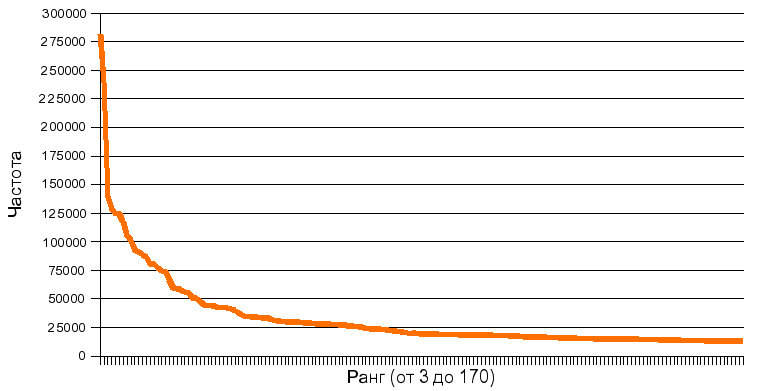

IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции.

In [ ]:
import math

from collections import Counter
from nltk.corpus import reuters


nltk.download('reuters')


def DF(term, docs):
    counts = sum(term in [w.lower() for w in reuters.words(d)] for d in docs)
    counts = counts if counts > 0 else 1
    return counts / len(docs)


files = reuters.fileids()
IDF = {
    r: math.log(1 / DF(r, files))
    for r in nltk.word_tokenize(request.lower())
}
print(IDF)

[nltk_data] Downloading package reuters to /root/nltk_data...


{'the': 0.4395488711591347, 'market': 2.0117101254857497, 'capitalization': 8.593042503699674, 'of': 0.34739560282581505, 'tesla': 9.28618968425962, 'company': 1.445089918837501}


In [ ]:
for d in documents:
    score = sum(
        TF(w, d.lower()) * IDF[w]
        for w in nltk.word_tokenize(request.lower())
    )
    print(f"{score:.3f} - {d}")

0.825 - Tesla, Inc. is an American electric vehicle and clean energy company.
1.446 - Tesla has a market capitalization of $786.98 Billion according to our data.
0.553 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
1.082 - Apple company has a market capitalization of $2.271 Trillion. Apple is the world's most valuable company by market capitalization.


<br>

---
<br>

# План на сегодня
* Предобработка текста
* Парсинг
* Задачи NLP
* TF-IDF
* **Семантический анализ**

<br>

---
<br>

# Семантический анализ

Сложности:

* Предложения можно двояко интерпретировать
* Слова могут быть заменены на синонимы
* Омонимы имеют по несколько значений

Как же искать нужную информацию по смыслу (семантике), а не конкретным словам (лексике)?

## WordNet

Тезаурус -- это машиночитаемый словарь какого-то языка, составленный лингвистами и содержащий информацию о связях между словами.

WordNet разбит на синсеты -- наборы синонимичных слов и словосочетаний. Между синсетами установлены бинарные отношения, такие, как гипоним-гипероним, то есть "частное-общее". Например, "спаржа" является частным случаем "овощей". Такая разметка на синонимы и гиперонимы позволяет устанавливать отношения между словами с большей надёжностью (по крайней мере, в теории), чем при помощи word2vec и прочей дистрибутивной семантики.

Основными сущностями в тезаурусе являются Sense (смысл) - одно конкретное слово или словосочетание с конкретным же значением, а также Synset (синсет) - множество сущностей Sense с одинаковыми значениями и с одной частью речи.

In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

print(wn.synsets('dog'))
print(wn.synsets('dog', pos=wn.VERB))

[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]
[Synset('chase.v.01')]


In [ ]:
print(wn.synset('dog.n.01'))
print(wn.synset('dog.n.01').definition())
print(len(wn.synset('dog.n.01').examples()))
print(wn.synset('dog.n.01').examples()[0])

Synset('dog.n.01')
a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
1
the dog barked all night


In [ ]:
print(wn.synset('dog.n.01').lemmas())
print([str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()])
print(wn.lemma('dog.n.01.dog').synset())

[Lemma('dog.n.01.dog'), Lemma('dog.n.01.domestic_dog'), Lemma('dog.n.01.Canis_familiaris')]
['dog', 'domestic_dog', 'Canis_familiaris']
Synset('dog.n.01')


In [ ]:
dog = wn.synset('dog.n.01')
print(dog.hypernyms())
print(dog.hyponyms())
print(dog.member_holonyms())
print(dog.root_hypernyms())
print(wn.synset('dog.n.01').lowest_common_hypernyms(wn.synset('cat.n.01')))

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]
[Synset('canis.n.01'), Synset('pack.n.06')]
[Synset('entity.n.01')]
[Synset('carnivore.n.01')]


In [ ]:
good = wn.synset('good.a.01')
good.lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

[nltk:WordNet](https://www.nltk.org/howto/wordnet.html)

## RuWordNet

In [ ]:
!pip install ruwordnet
!ruwordnet download
from IPython.display import clear_output
clear_output()

In [ ]:
from ruwordnet import RuWordNet
wn = RuWordNet()

In [ ]:
for sense in wn.get_senses('замок'):
    print(sense.synset)

Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК")
Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")


In [ ]:
wn.get_senses('спаржа')[0].synset.hypernyms

[Synset(id="348-N", title="ОВОЩИ"),
 Synset(id="4789-N", title="ТРАВЯНИСТОЕ РАСТЕНИЕ"),
 Synset(id="6878-N", title="ОВОЩНАЯ КУЛЬТУРА")]

In [ ]:
wn.get_senses('овощи')[0].synset.hyponyms

[Synset(id="144194-N", title="ТЫКВА (ПЛОД)"),
 Synset(id="153883-N", title="ЗЕЛЕНЬ (ОВОЩИ)"),
 Synset(id="144191-N", title="ПОМИДОР (ПЛОД)"),
 Synset(id="144205-N", title="ПАТИССОН (ПЛОД)"),
 Synset(id="118660-N", title="ЗЕЛЕНЫЙ ГОРОШЕК"),
 Synset(id="144182-N", title="ЛУК (РАСТЕНИЕ)"),
 Synset(id="144207-N", title="СТРУЧКОВЫЙ ПЕРЕЦ (ПЛОД)"),
 Synset(id="144181-N", title="БАКЛАЖАН (ПЛОД)"),
 Synset(id="107993-N", title="АРТИШОК"),
 Synset(id="144216-N", title="КАБАЧОК (ПЛОД)"),
 Synset(id="144183-N", title="ЧЕСНОК"),
 Synset(id="108482-N", title="СПАРЖА"),
 Synset(id="144232-N", title="КОЧАН КАПУСТЫ"),
 Synset(id="148896-N", title="КОРНЕПЛОДНЫЕ ОВОЩИ"),
 Synset(id="144184-N", title="ОГУРЕЦ (ПЛОД)")]

In [ ]:
print(wn['134045-N'])
print(wn['11493827-n'])
print(wn['134045-N-189287'])
print(wn['electric_potential%1:19:00::'])
print(wn['потенциал'])
print(wn['potential'])

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ")
WNSense(key="electric_potential%1:19:00::", name="electric_potential")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]


In [ ]:
print(wn.get_synset_by_id("134045-N"))
print(wn.get_en_synset_by_id("11493827-n"))
print(wn.get_senses('потенциал'))
print(wn.get_synsets('потенциал'))
print(wn.get_en_senses('potential'))
print(wn.get_en_synsets('potential'))

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)"), Synset(id="134046-N", title="ПОТЕНЦИАЛ (РЕСУРС)")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]
[WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts"), WNSynset(id="00044353-a", definition="existing in possibility"), WNSynset(id="14482620-n", definition="the inherent capacity for coming into being")]


[RuWordNet](https://github.com/avidale/python-ruwordnet)

## LSA

Дистрибутивная гипотеза: 

лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения.

Следуя гипотезе, если взять большой набор данных и посчитать tf-idf матрицу для всех слов и документов, то полученные вектора будут представлять семантический смысл слов в многомерном пространстве.

<br>

Это многомерное пространство имеет слишком много измерений, но к счастью, мы можем применить Сингулярное разложение (Singular Value Devomposition, SVD) для вывода наиболее важных измерений.

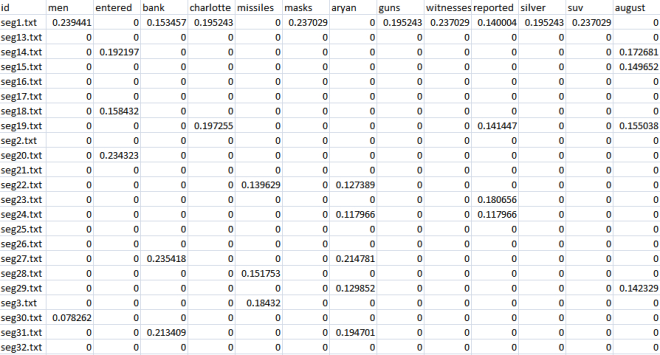

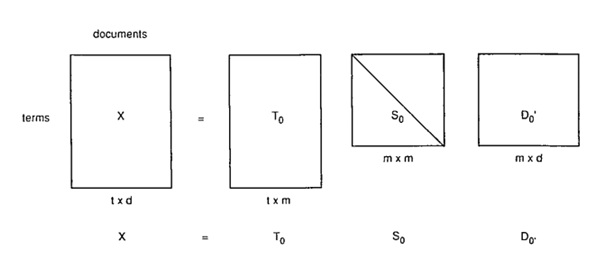

In [ ]:
nltk.download("reuters")

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import reuters

def simple_preprocess(s):
    s = re.sub(r"[^a-z]+", " ", s.lower())
    s = re.sub(r"\s{2,}", " ", s)
    return s.strip()

corpus = [simple_preprocess(" ".join(reuters.words(f))) for f in reuters.fileids()]
len(corpus)

10788

In [ ]:
corpus[0]

'asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia s exporting nations that the row could inflict far reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u s move against japan might boost protectionist sentiment in the u s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long run in the short term tokyo s loss might be their gain the u s has said it will impose mln dlrs of tariffs on imports of japanese electronics goods on april in retaliation for japan s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost unofficial japanese estimates put the impact of the tariffs at billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes we wouldn t be able to do business sa

In [ ]:
corpus[7][:100]

'sri lanka gets usda approval for wheat price food department officials said the u s department of ag'

In [ ]:
words = set(w.lower() for d in corpus for w in d.split())
len(words)

29187

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(10788, 29161)

In [ ]:
len(vectorizer.vocabulary_)

29161

In [ ]:
{w for w in words if w not in vectorizer.vocabulary_}

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
print(vectorizer.vocabulary_["king"])
print(vectorizer.vocabulary_["queen"])
print(vectorizer.vocabulary_["wolf"])
print(vectorizer.vocabulary_["dog"])

14229
20754
28767
7685


In [ ]:
vector = X.T[vectorizer.vocabulary_["king"]]
vector

<1x10788 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Column format>

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(X.T)
X_svd.shape

T-SNE

(29161, 50)

In [ ]:
from scipy.spatial import distance

def get_embedding(word):
    return X_svd[vectorizer.vocabulary_[word]]

print(distance.euclidean(get_embedding("king"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("queen")))
print(distance.euclidean(get_embedding("book"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("book")))

0.06861685043414627
0.0205948770989939
0.06771907958101814
0.06877604549449676


In [ ]:
print(distance.euclidean(get_embedding("wolf"), get_embedding("book")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("dog")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("hare")))

0.07327887911986691
0.026461172237673407
0.02695527772570916


In [ ]:
print(distance.euclidean(get_embedding("wolf"), get_embedding("queen")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("king")))

# get_embedding("king") - get_embedding("boy") + get_embedding("girl") = get_embedding("queen")

0.03179426146588473
0.07603646088598133


[Латентно-семантический_анализ](https://ru.wikipedia.org/wiki/Латентно-семантический_анализ)

# Что почитать

Лейн, Хапке, Ховард. Обработка естественного языка в действии (2020)

[Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/)

## Спасибо за внимание!